In [1]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from tabulate import tabulate 
import glob

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
NABIS = pd.read_excel(r"C:\Hwan\NABIS\진짜 최종 중에 최종 data.xlsx")
NABIS = pd.DataFrame(NABIS)
NABIS

,진료과목,연도,지역,의료기관,의료수가,가중치,지역 소아과 수,최종수가,강원특별자치도_건강보험,강원특별자치도_소아과 병원 수,...,경상북도_소아과 의료인력 수,경상북도_천명당 소아과 수,경상남도_건강보험,경상남도_소아과 병원 수,경상남도_소아과 의료인력 수,경상남도_천명당 소아과 수,제주특별자치도_건강보험,제주특별자치도_소아과 병원 수,제주특별자치도_소아과 의료인력 수,제주특별자치도_천명당 소아과 수
0,감염성 및 상세불명의 기타 위장염 및 결장염,2019,강원특별자치도,병원,258854,74.9,864,19388164.6,1491120,864,...,828,0.107825,3327339,1648,1380,0.122985,666488,480,270,0.180723
1,감염성 및 상세불명의 기타 위장염 및 결장염,2019,강원특별자치도,의원,258854,83.4,864,21588423.6,1491120,864,...,828,0.107825,3327339,1648,1380,0.122985,666488,480,270,0.180723
2,감염성 및 상세불명의 기타 위장염 및 결장염,2019,경기도,병원,258854,74.9,10940,19388164.6,1491120,864,...,828,0.107825,3327339,1648,1380,0.122985,666488,480,270,0.180723
3,감염성 및 상세불명의 기타 위장염 및 결장염,2019,경기도,의원,258854,83.4,10940,21588423.6,1491120,864,...,828,0.107825,3327339,1648,1380,0.122985,666488,480,270,0.180723
4,감염성 및 상세불명의 기타 위장염 및 결장염,2019,경상남도,병원,258854,74.9,8032,19388164.6,1491120,864,...,828,0.107825,3327339,1648,1380,0.122985,666488,480,270,0.180723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,코로나19 바이러스 질환,2022,제주특별자치도,의원,617545,78.4,8032,48415528.0,1503671,904,...,768,0.107388,3250104,1472,1494,0.111956,675627,552,295,0.204444
1788,코로나19 바이러스 질환,2022,충청남도,병원,617545,78.4,996,48415528.0,1503671,904,...,768,0.107388,3250104,1472,1494,0.111956,675627,552,295,0.204444
1789,코로나19 바이러스 질환,2022,충청남도,의원,617545,90.2,996,55702559.0,1503671,904,...,768,0.107388,3250104,1472,1494,0.111956,675627,552,295,0.204444
1790,코로나19 바이러스 질환,2022,충청북도,병원,617545,78.4,816,48415528.0,1503671,904,...,768,0.107388,3250104,1472,1494,0.111956,675627,552,295,0.204444


In [3]:
NABIS.isna().sum()

진료과목                  0
연도                    0
지역                    0
의료기관                  0
의료수가                  0
                     ..
경상남도_천명당 소아과 수        0
제주특별자치도_건강보험          0
제주특별자치도_소아과 병원 수      0
제주특별자치도_소아과 의료인력 수    0
제주특별자치도_천명당 소아과 수     0
Length: 72, dtype: int64

In [4]:
NABIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 72 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   진료과목                1792 non-null   object 
 1   연도                  1792 non-null   int64  
 2   지역                  1792 non-null   object 
 3   의료기관                1792 non-null   object 
 4   의료수가                1792 non-null   int64  
 5   가중치                 1792 non-null   float64
 6   지역 소아과 수            1792 non-null   int64  
 7   최종수가                1792 non-null   float64
 8   강원특별자치도_건강보험        1792 non-null   int64  
 9   강원특별자치도_소아과 병원 수    1792 non-null   int64  
 10  강원특별자치도_소아과 의료인력 수  1792 non-null   int64  
 11  강원특별자치도_천명당 소아과 수   1792 non-null   float64
 12  경기도_건강보험            1792 non-null   int64  
 13  경기도_소아과 병원 수        1792 non-null   int64  
 14  경기도_소아과 의료인력 수      1792 non-null   int64  
 15  경기도_천명당 소아과 수       1792 non-null   float64
 16  광주광역시_

In [5]:
from sklearn.preprocessing import LabelEncoder

orderLe = LabelEncoder()
regionLe = LabelEncoder()

NABIS['진료과목_인코딩'] = orderLe.fit_transform(NABIS['진료과목'])
NABIS['지역_인코딩'] = regionLe.fit_transform(NABIS['지역'])

# 병원은 0, 의원 1
NABIS['의료기관_인코딩'] = NABIS['의료기관'].apply(lambda x: 0 if x == '병원' else 1)

NABIS

,진료과목,연도,지역,의료기관,의료수가,가중치,지역 소아과 수,최종수가,강원특별자치도_건강보험,강원특별자치도_소아과 병원 수,...,경상남도_소아과 병원 수,경상남도_소아과 의료인력 수,경상남도_천명당 소아과 수,제주특별자치도_건강보험,제주특별자치도_소아과 병원 수,제주특별자치도_소아과 의료인력 수,제주특별자치도_천명당 소아과 수,진료과목_인코딩,지역_인코딩,의료기관_인코딩
0,감염성 및 상세불명의 기타 위장염 및 결장염,2019,강원특별자치도,병원,258854,74.9,864,19388164.6,1491120,864,...,1648,1380,0.122985,666488,480,270,0.180723,0,0,0
1,감염성 및 상세불명의 기타 위장염 및 결장염,2019,강원특별자치도,의원,258854,83.4,864,21588423.6,1491120,864,...,1648,1380,0.122985,666488,480,270,0.180723,0,0,1
2,감염성 및 상세불명의 기타 위장염 및 결장염,2019,경기도,병원,258854,74.9,10940,19388164.6,1491120,864,...,1648,1380,0.122985,666488,480,270,0.180723,0,1,0
3,감염성 및 상세불명의 기타 위장염 및 결장염,2019,경기도,의원,258854,83.4,10940,21588423.6,1491120,864,...,1648,1380,0.122985,666488,480,270,0.180723,0,1,1
4,감염성 및 상세불명의 기타 위장염 및 결장염,2019,경상남도,병원,258854,74.9,8032,19388164.6,1491120,864,...,1648,1380,0.122985,666488,480,270,0.180723,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,코로나19 바이러스 질환,2022,제주특별자치도,의원,617545,78.4,8032,48415528.0,1503671,904,...,1472,1494,0.111956,675627,552,295,0.204444,13,13,1
1788,코로나19 바이러스 질환,2022,충청남도,병원,617545,78.4,996,48415528.0,1503671,904,...,1472,1494,0.111956,675627,552,295,0.204444,13,14,0
1789,코로나19 바이러스 질환,2022,충청남도,의원,617545,90.2,996,55702559.0,1503671,904,...,1472,1494,0.111956,675627,552,295,0.204444,13,14,1
1790,코로나19 바이러스 질환,2022,충청북도,병원,617545,78.4,816,48415528.0,1503671,904,...,1472,1494,0.111956,675627,552,295,0.204444,13,15,0


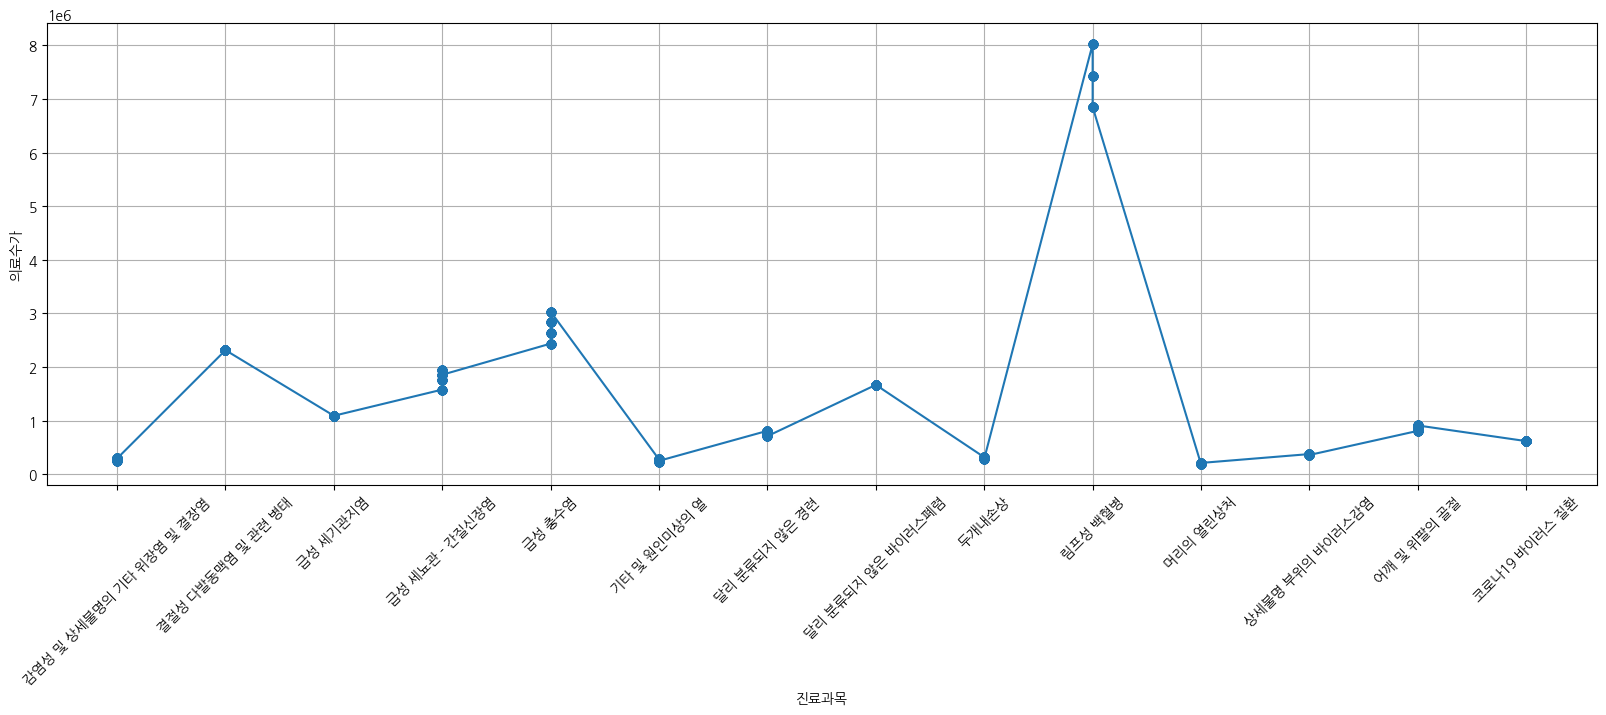

In [10]:
plt.figure(figsize=(20, 6))
plt.plot(NABIS["진료과목"], NABIS["의료수가"], marker='o')
plt.xlabel('진료과목')
plt.ylabel("의료수가")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [88]:
for index, label in enumerate(regionLe.classes_):
    print(f"{label} -> {index}")

강원특별자치도 -> 0
경기도 -> 1
경상남도 -> 2
경상북도 -> 3
광주광역시 -> 4
대구광역시 -> 5
대전광역시 -> 6
부산광역시 -> 7
서울특별시 -> 8
울산광역시 -> 9
인천광역시 -> 10
전라남도 -> 11
전북특별자치도 -> 12
제주특별자치도 -> 13
충청남도 -> 14
충청북도 -> 15


In [89]:
NABIS.drop(['진료과목', '지역', '의료기관'], axis=1, inplace=True)

NABIS

,연도,의료수가,가중치,지역 소아과 수,최종수가,강원특별자치도_건강보험,강원특별자치도_소아과 병원 수,강원특별자치도_소아과 의료인력 수,강원특별자치도_천명당 소아과 수,경기도_건강보험,...,경상남도_소아과 병원 수,경상남도_소아과 의료인력 수,경상남도_천명당 소아과 수,제주특별자치도_건강보험,제주특별자치도_소아과 병원 수,제주특별자치도_소아과 의료인력 수,제주특별자치도_천명당 소아과 수,진료과목_인코딩,지역_인코딩,의료기관_인코딩
0,2019,258854,74.9,864,19388164.6,1491120,864,527,0.142105,13413979,...,1648,1380,0.122985,666488,480,270,0.180723,0,0,0
1,2019,258854,83.4,864,21588423.6,1491120,864,527,0.142105,13413979,...,1648,1380,0.122985,666488,480,270,0.180723,0,0,1
2,2019,258854,74.9,10940,19388164.6,1491120,864,527,0.142105,13413979,...,1648,1380,0.122985,666488,480,270,0.180723,0,1,0
3,2019,258854,83.4,10940,21588423.6,1491120,864,527,0.142105,13413979,...,1648,1380,0.122985,666488,480,270,0.180723,0,1,1
4,2019,258854,74.9,8032,19388164.6,1491120,864,527,0.142105,13413979,...,1648,1380,0.122985,666488,480,270,0.180723,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,2022,617545,78.4,8032,48415528.0,1503671,904,618,0.148003,13857593,...,1472,1494,0.111956,675627,552,295,0.204444,13,13,1
1788,2022,617545,78.4,996,48415528.0,1503671,904,618,0.148003,13857593,...,1472,1494,0.111956,675627,552,295,0.204444,13,14,0
1789,2022,617545,90.2,996,55702559.0,1503671,904,618,0.148003,13857593,...,1472,1494,0.111956,675627,552,295,0.204444,13,14,1
1790,2022,617545,78.4,816,48415528.0,1503671,904,618,0.148003,13857593,...,1472,1494,0.111956,675627,552,295,0.204444,13,15,0


In [90]:
NABIS.columns

Index(['연도', '의료수가', '가중치', '지역 소아과 수', '최종수가', '강원특별자치도_건강보험',
       '강원특별자치도_소아과 병원 수', '강원특별자치도_소아과 의료인력 수', '강원특별자치도_천명당 소아과 수',
       '경기도_건강보험', '경기도_소아과 병원 수', '경기도_소아과 의료인력 수', '경기도_천명당 소아과 수',
       '광주광역시_건강보험', '광주광역시_소아과 병원 수', '광주광역시_소아과 의료인력 수', '광주광역시_천명당 소아과 수',
       '대구광역시_건강보험', '대구광역시_소아과 병원 수', '대구광역시_소아과 의료인력 수', '대구광역시_천명당 소아과 수',
       '대전광역시_건강보험', '대전광역시_소아과 병원 수', '대전광역시_소아과 의료인력 수', '대전광역시_천명당 소아과 수',
       '부산광역시_건강보험', '부산광역시_소아과 병원 수', '부산광역시_소아과 의료인력 수', '부산광역시_천명당 소아과 수',
       '서울특별시_건강보험', '서울특별시_소아과 병원 수', '서울특별시_소아과 의료인력 수', '서울특별시_천명당 소아과 수',
       '울산광역시_건강보험', '울산광역시_소아과 병원 수', '울산광역시_소아과 의료인력 수', '울산광역시_천명당 소아과 수',
       '인천광역시_건강보험', '인천광역시_소아과 병원 수', '인천광역시_소아과 의료인력 수', '인천광역시_천명당 소아과 수',
       '충청남도_건강보험', '충청남도_소아과 병원 수', '충청남도_소아과 의료인력 수', '충청남도_천명당 소아과 수',
       '충청북도_건강보험', '충청북도_소아과 병원 수', '충청북도_소아과 의료인력 수', '충청북도_천명당 소아과 수',
       '전북특별자치도_건강보험', '전북특별자치도_소아과 병원 수', '전북특별자치도_소아과 의료인력 수',
       '전북특별자치도_천명당 소아과 수', '전라남도_건강보

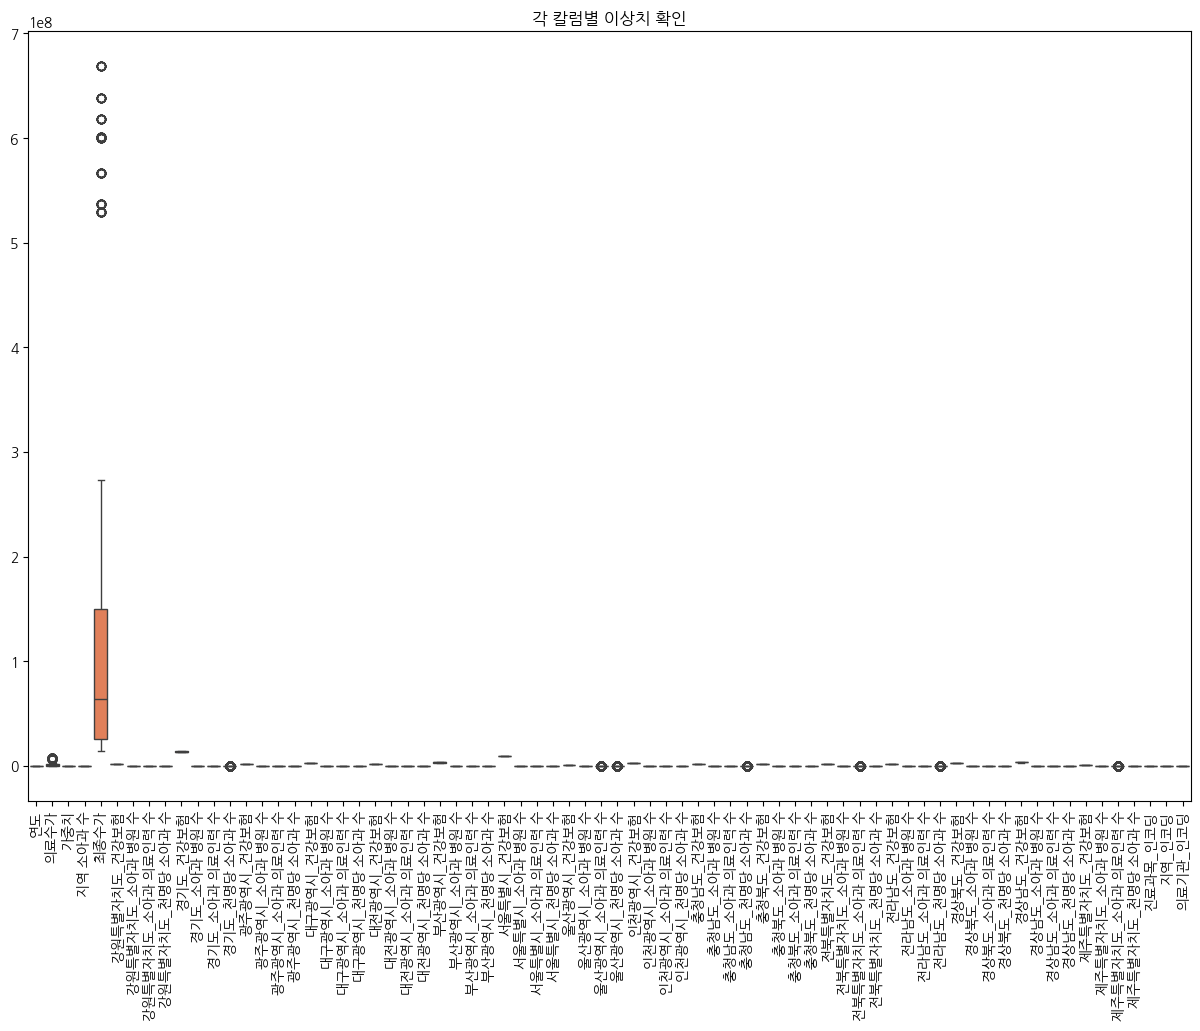

In [91]:
# 이상치 확인
plt.figure(figsize=(15, 10))
sns.boxplot(data=NABIS)
plt.xticks(rotation=90)
plt.title('각 칼럼별 이상치 확인')
plt.show()

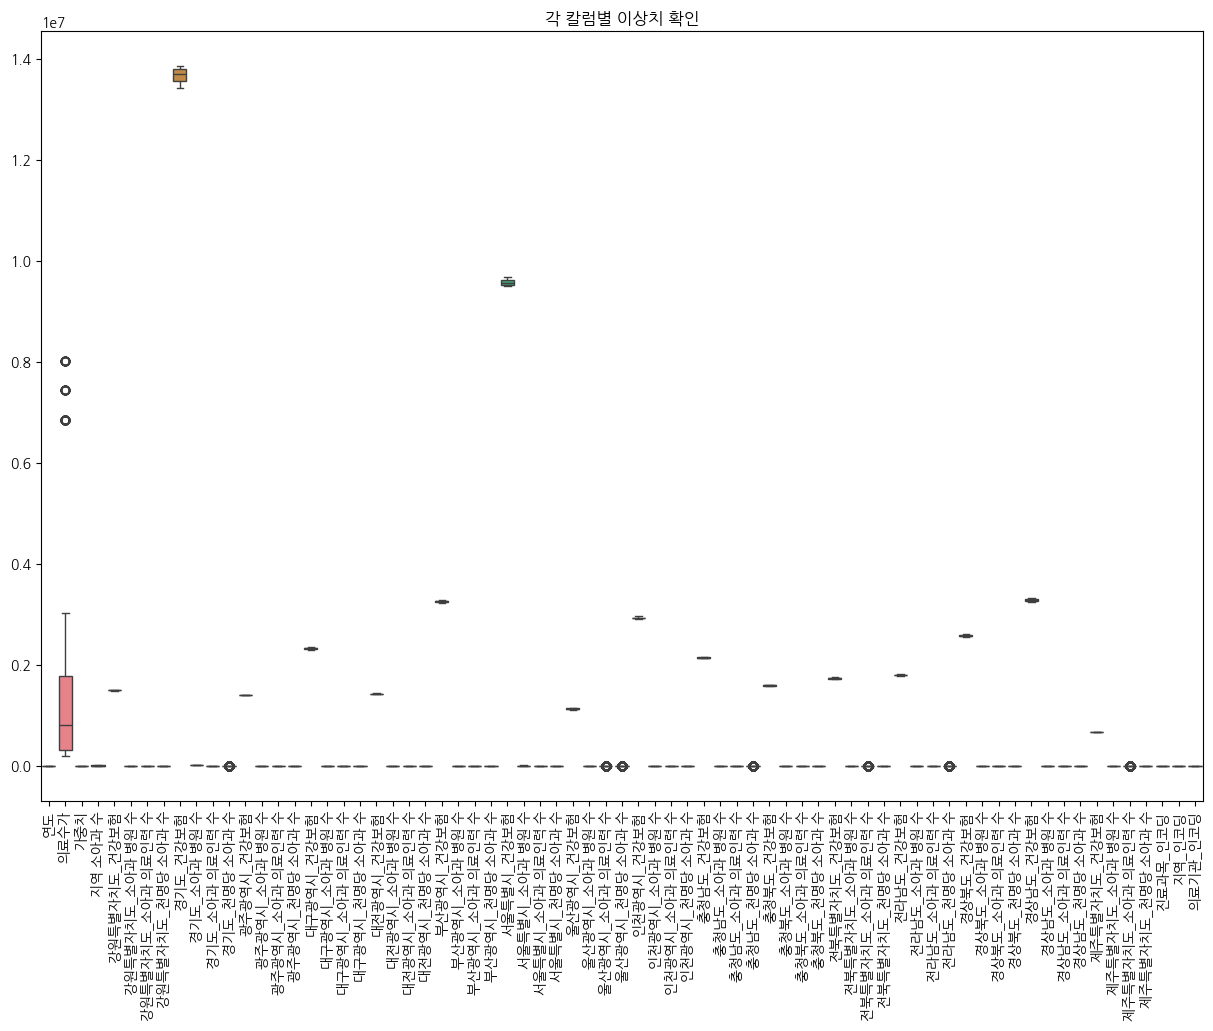

In [92]:
# 최종수가가 없는 상태에서 이상치 확인

MABIS_drop_sooga = NABIS.drop(columns=["최종수가"])
plt.figure(figsize=(15, 10))
sns.boxplot(data=MABIS_drop_sooga)
plt.xticks(rotation=90)
plt.title('각 칼럼별 이상치 확인')
plt.show()

In [93]:
# 이상치를 포함하고 있어도 효과적인 DBSCAN 알고리즘 사용 
# 스케일 조정으로 더욱 긍정적인 값을 기대하기 위해 스케일링 사용 

In [94]:
# data 표준화 - StandardScaler
scaler = StandardScaler()
NABIS['최종수가_표준화'] = scaler.fit_transform(NABIS[['최종수가']])
NABIS["의료수가_표준화"] = scaler.fit_transform(NABIS[["의료수가"]])
NABIS["강원특별자치도 건강보험_표준화"] = scaler.fit_transform(NABIS[["강원특별자치도_건강보험"]])
NABIS["경기도 건강보험_표준화"] = scaler.fit_transform(NABIS[["경기도_건강보험"]])
NABIS["광주광역시 건강보험_표준화"] = scaler.fit_transform(NABIS[["광주광역시_건강보험"]])
NABIS["대구광역시 건강보험_표준화"] = scaler.fit_transform(NABIS[["대구광역시_건강보험"]])
NABIS["대전광역시 건강보험_표준화"] = scaler.fit_transform(NABIS[["대전광역시_건강보험"]])
NABIS["부산광역시 건강보험_표준화"] = scaler.fit_transform(NABIS[["부산광역시_건강보험"]])
NABIS["서울특별시 건강보험_표준화"] = scaler.fit_transform(NABIS[["서울특별시_건강보험"]])
NABIS["울산광역시 건강보험_표준화"] = scaler.fit_transform(NABIS[["울산광역시_건강보험"]])
NABIS["인천광역시 건강보험_표준화"] = scaler.fit_transform(NABIS[["인천광역시_건강보험"]])
NABIS["충청남도 건강보험_표준화"] = scaler.fit_transform(NABIS[["충청남도_건강보험"]])
NABIS["충청북도 건강보험_표준화"] = scaler.fit_transform(NABIS[["충청북도_건강보험"]])
NABIS["전북특별자치도 건강보험_표준화"] = scaler.fit_transform(NABIS[["전북특별자치도_건강보험"]])
NABIS["전라남도 건강보험_표준화"] = scaler.fit_transform(NABIS[["전라남도_건강보험"]])
NABIS["경상남도 건강보험_표준화"] = scaler.fit_transform(NABIS[["경상남도_건강보험"]])
NABIS["제주특별자치도 건강보험_표준화"] = scaler.fit_transform(NABIS[["제주특별자치도_건강보험"]])

NABIS

,연도,의료수가,가중치,지역 소아과 수,최종수가,강원특별자치도_건강보험,강원특별자치도_소아과 병원 수,강원특별자치도_소아과 의료인력 수,강원특별자치도_천명당 소아과 수,경기도_건강보험,...,부산광역시 건강보험_표준화,서울특별시 건강보험_표준화,울산광역시 건강보험_표준화,인천광역시 건강보험_표준화,충청남도 건강보험_표준화,충청북도 건강보험_표준화,전북특별자치도 건강보험_표준화,전라남도 건강보험_표준화,경상남도 건강보험_표준화,제주특별자치도 건강보험_표준화
0,2019,258854,74.9,864,19388164.6,1491120,864,527,0.142105,13413979,...,1.383329,1.464495,1.426093,-0.462502,-0.743889,-0.948506,1.470141,1.512370,1.36859,-1.266877
1,2019,258854,83.4,864,21588423.6,1491120,864,527,0.142105,13413979,...,1.383329,1.464495,1.426093,-0.462502,-0.743889,-0.948506,1.470141,1.512370,1.36859,-1.266877
2,2019,258854,74.9,10940,19388164.6,1491120,864,527,0.142105,13413979,...,1.383329,1.464495,1.426093,-0.462502,-0.743889,-0.948506,1.470141,1.512370,1.36859,-1.266877
3,2019,258854,83.4,10940,21588423.6,1491120,864,527,0.142105,13413979,...,1.383329,1.464495,1.426093,-0.462502,-0.743889,-0.948506,1.470141,1.512370,1.36859,-1.266877
4,2019,258854,74.9,8032,19388164.6,1491120,864,527,0.142105,13413979,...,1.383329,1.464495,1.426093,-0.462502,-0.743889,-0.948506,1.470141,1.512370,1.36859,-1.266877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,2022,617545,78.4,8032,48415528.0,1503671,904,618,0.148003,13857593,...,-1.341178,-1.094750,-1.226490,1.612584,1.578680,1.559320,-1.306939,-1.150523,-1.34357,1.400556
1788,2022,617545,78.4,996,48415528.0,1503671,904,618,0.148003,13857593,...,-1.341178,-1.094750,-1.226490,1.612584,1.578680,1.559320,-1.306939,-1.150523,-1.34357,1.400556
1789,2022,617545,90.2,996,55702559.0,1503671,904,618,0.148003,13857593,...,-1.341178,-1.094750,-1.226490,1.612584,1.578680,1.559320,-1.306939,-1.150523,-1.34357,1.400556
1790,2022,617545,78.4,816,48415528.0,1503671,904,618,0.148003,13857593,...,-1.341178,-1.094750,-1.226490,1.612584,1.578680,1.559320,-1.306939,-1.150523,-1.34357,1.400556


In [95]:
NABIS['서울특별시_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['서울특별시_소아과 병원 수']])
NABIS["서울특별시_소아과 의료인력 수-표준화"] = scaler.fit_transform(NABIS[["서울특별시_소아과 의료인력 수"]])

NABIS['경기도_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['경기도_소아과 병원 수']])
NABIS['경기도_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['경기도_소아과 의료인력 수']])

NABIS['광주광역시_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['광주광역시_소아과 병원 수']])
NABIS['광주광역시_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['광주광역시_소아과 의료인력 수']])

NABIS['대구광역시_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['대구광역시_소아과 병원 수']])
NABIS['대구광역시_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['대구광역시_소아과 의료인력 수']])

NABIS['대전광역시_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['대전광역시_소아과 병원 수']])
NABIS['대전광역시_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['대전광역시_소아과 의료인력 수']])

NABIS['부산광역시_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['부산광역시_소아과 병원 수']])
NABIS['부산광역시_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['부산광역시_소아과 의료인력 수']])

NABIS['서울특별시_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['서울특별시_소아과 병원 수']])
NABIS['서울특별시_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['서울특별시_소아과 의료인력 수']])

NABIS['울산광역시_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['울산광역시_소아과 병원 수']])
NABIS['울산광역시_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['울산광역시_소아과 의료인력 수']])

NABIS['인천광역시_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['인천광역시_소아과 병원 수']])
NABIS['인천광역시_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['인천광역시_소아과 의료인력 수']])

NABIS['충청남도_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['충청남도_소아과 병원 수']])
NABIS['충청남도_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['충청남도_소아과 의료인력 수']])

NABIS['충청북도_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['충청북도_소아과 병원 수']])
NABIS['충청북도_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['충청북도_소아과 의료인력 수']])

NABIS['전북특별자치도_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['전북특별자치도_소아과 병원 수']])
NABIS['전북특별자치도_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['전북특별자치도_소아과 의료인력 수']])

NABIS['전라남도_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['전라남도_소아과 병원 수']])
NABIS['전라남도_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['전라남도_소아과 의료인력 수']])

NABIS['경상북도_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['경상북도_소아과 병원 수']])
NABIS['경상북도_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['경상북도_소아과 의료인력 수']])

NABIS['경상남도_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['경상남도_소아과 병원 수']])
NABIS['경상남도_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['경상남도_소아과 의료인력 수']])

NABIS['제주특별자치도_소아과 병원 수_표준화'] = scaler.fit_transform(NABIS[['제주특별자치도_소아과 병원 수']])
NABIS['제주특별자치도_소아과 의료인력 수_표준화'] = scaler.fit_transform(NABIS[['제주특별자치도_소아과 의료인력 수']])

In [96]:
NABIS.columns

Index(['연도', '의료수가', '가중치', '지역 소아과 수', '최종수가', '강원특별자치도_건강보험',
       '강원특별자치도_소아과 병원 수', '강원특별자치도_소아과 의료인력 수', '강원특별자치도_천명당 소아과 수',
       '경기도_건강보험',
       ...
       '전북특별자치도_소아과 병원 수_표준화', '전북특별자치도_소아과 의료인력 수_표준화', '전라남도_소아과 병원 수_표준화',
       '전라남도_소아과 의료인력 수_표준화', '경상북도_소아과 병원 수_표준화', '경상북도_소아과 의료인력 수_표준화',
       '경상남도_소아과 병원 수_표준화', '경상남도_소아과 의료인력 수_표준화', '제주특별자치도_소아과 병원 수_표준화',
       '제주특별자치도_소아과 의료인력 수_표준화'],
      dtype='object', length=120)

In [97]:
NABIS.to_csv("./진짜 진짜 진짜로 전처리 완료된 대회 분석 데이터.csv")

In [98]:
'''    '강원특별자치도_소아과 병원 수', '강원특별자치도_소아과 의료인력 수',
    '경기도_소아과 병원 수', '경기도_소아과 의료인력 수',
    '광주광역시_소아과 병원 수', '광주광역시_소아과 의료인력 수',
    '대구광역시_소아과 병원 수', '대구광역시_소아과 의료인력 수',
    '대전광역시_소아과 병원 수', '대전광역시_소아과 의료인력 수',
    '부산광역시_소아과 병원 수', '부산광역시_소아과 의료인력 수',
    '서울특별시_소아과 병원 수', '서울특별시_소아과 의료인력 수',
    '울산광역시_소아과 병원 수', '울산광역시_소아과 의료인력 수',
    '인천광역시_소아과 병원 수', '인천광역시_소아과 의료인력 수',
    '충청남도_소아과 병원 수', '충청남도_소아과 의료인력 수',
    '충청북도_소아과 병원 수', '충청북도_소아과 의료인력 수',
    '전북특별자치도_소아과 병원 수', '전북특별자치도_소아과 의료인력 수',
    '전라남도_소아과 병원 수', '전라남도_소아과 의료인력 수',
    '경상북도_소아과 병원 수', '경상북도_소아과 의료인력 수',
    '경상남도_소아과 병원 수', '경상남도_소아과 의료인력 수',
    '제주특별자치도_소아과 병원 수', '제주특별자치도_소아과 의료인력 수'
'''    
features = NABIS[['진료과목_인코딩', '지역_인코딩', '의료기관_인코딩', '최종수가_표준화', '지역 소아과 수', '강원특별자치도_소아과 병원 수', '강원특별자치도_소아과 의료인력 수',
    '경기도_소아과 병원 수', '경기도_소아과 의료인력 수',
    '광주광역시_소아과 병원 수', '광주광역시_소아과 의료인력 수',
    '대구광역시_소아과 병원 수', '대구광역시_소아과 의료인력 수',
    '대전광역시_소아과 병원 수', '대전광역시_소아과 의료인력 수',
    '부산광역시_소아과 병원 수', '부산광역시_소아과 의료인력 수',
    '서울특별시_소아과 병원 수', '서울특별시_소아과 의료인력 수',
    '울산광역시_소아과 병원 수', '울산광역시_소아과 의료인력 수',
    '인천광역시_소아과 병원 수', '인천광역시_소아과 의료인력 수',
    '충청남도_소아과 병원 수', '충청남도_소아과 의료인력 수',
    '충청북도_소아과 병원 수', '충청북도_소아과 의료인력 수',
    '전북특별자치도_소아과 병원 수', '전북특별자치도_소아과 의료인력 수',
    '전라남도_소아과 병원 수', '전라남도_소아과 의료인력 수',
    '경상북도_소아과 병원 수', '경상북도_소아과 의료인력 수',
    '경상남도_소아과 병원 수', '경상남도_소아과 의료인력 수',
    '제주특별자치도_소아과 병원 수', '제주특별자치도_소아과 의료인력 수']]

# eps: 두 샘플이 같은 군집에 속한다고 간주하기 위한 최대 거리
# min_samples: 한 점을 핵심 포인트로 간주하기 위한 최소 샘플 수
dbscan = DBSCAN(eps=0.4, min_samples=10)

NABIS['DBSCAN 군집'] = dbscan.fit_predict(features)

Goonjib = './DBSCAN 군집화 결과2.xlsx'
NABIS.to_excel(Goonjib, index=False)

NABIS['DBSCAN 군집'].value_counts()

DBSCAN 군집
-1    1792
Name: count, dtype: int64

In [105]:
from sklearn.cluster import KMeans

# n_clusters: 군집 개수를 설정 
n_clusters = 39
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

NABIS['K-MEAN 군집'] = kmeans.fit_predict(features)

KGoonjib = './K-MEAN 군집화 결과2.xlsx'
NABIS.to_excel(KGoonjib, index=False)

NABIS['K-MEAN 군집'].value_counts()

K-MEAN 군집
1     168
9     168
5     168
8     168
0      56
15     56
20     56
13     56
3      56
19     28
12     28
16     28
29     28
27     28
30     28
38     28
11     28
33     28
36     28
18     28
6      28
17     28
37     28
2      28
21     28
34     28
31     28
10     28
4      28
23     28
32     28
7      28
24     28
28     28
26     28
14     28
22     28
35     28
25     28
Name: count, dtype: int64

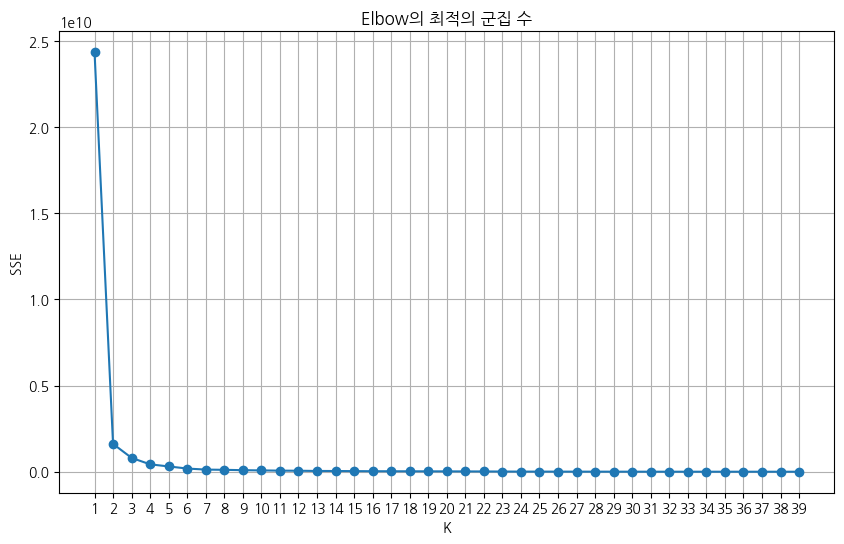

In [100]:
# Elbow 방법으로 SSE(군집내 제곱합)을 계산하여 최적의 군집 수 찾기
sse = []  
k_range = range(1, 40)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow의 최적의 군집 수')
plt.xticks(k_range)
plt.grid(True)
plt.show()

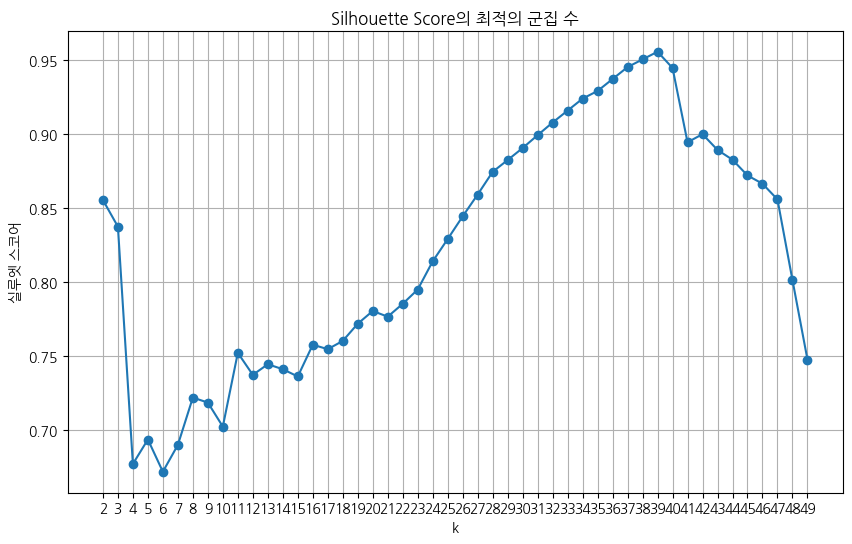

In [101]:
from sklearn.metrics import silhouette_score

# 실루엣 계수로 최적의 군집 수 찾기
silhouette_scores = []
k_range = range(2, 50)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('실루엣 스코어')
plt.title('Silhouette Score의 최적의 군집 수')
plt.xticks(k_range)
plt.grid(True)
plt.show()


군집별 데이터 수:
 K-MEAN 군집
1     168
9     168
5     168
8     168
0      56
15     56
20     56
13     56
3      56
19     28
12     28
16     28
29     28
27     28
30     28
38     28
11     28
33     28
36     28
18     28
6      28
17     28
37     28
2      28
21     28
34     28
31     28
10     28
4      28
23     28
32     28
7      28
24     28
28     28
26     28
14     28
22     28
35     28
25     28
Name: count, dtype: int64

군집별 평균값:
                연도          의료수가        가중치  지역 소아과 수          최종수가  \
K-MEAN 군집                                                            
0          2019.0  1.482766e+06  79.150000     840.0  1.173609e+08   
1          2020.0  1.464177e+06  77.000000    8032.0  1.127416e+08   
2          2021.0  1.461792e+06  82.450000   10940.0  1.205247e+08   
3          2021.0  1.461792e+06  82.450000    1000.0  1.205247e+08   
4          2020.0  1.464177e+06  81.000000    2172.0  1.185983e+08   
5          2021.0  1.461792e+06  78.158333    8032.0  1.1425

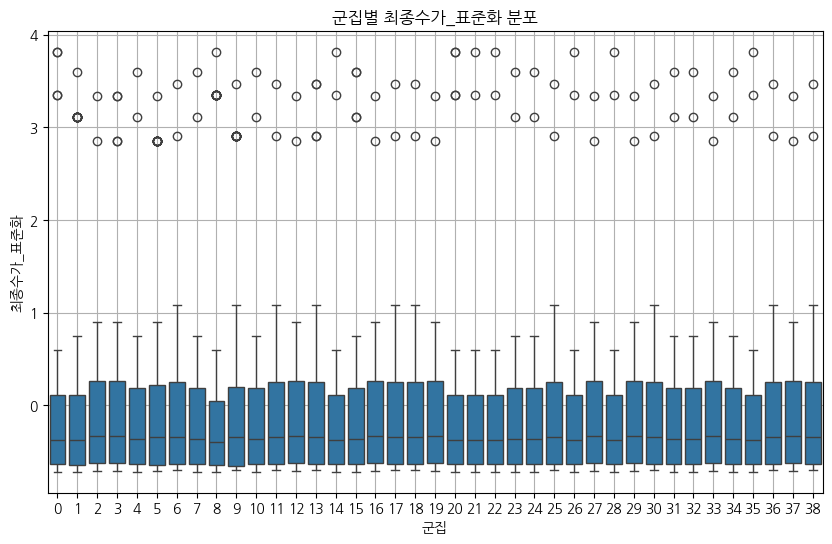

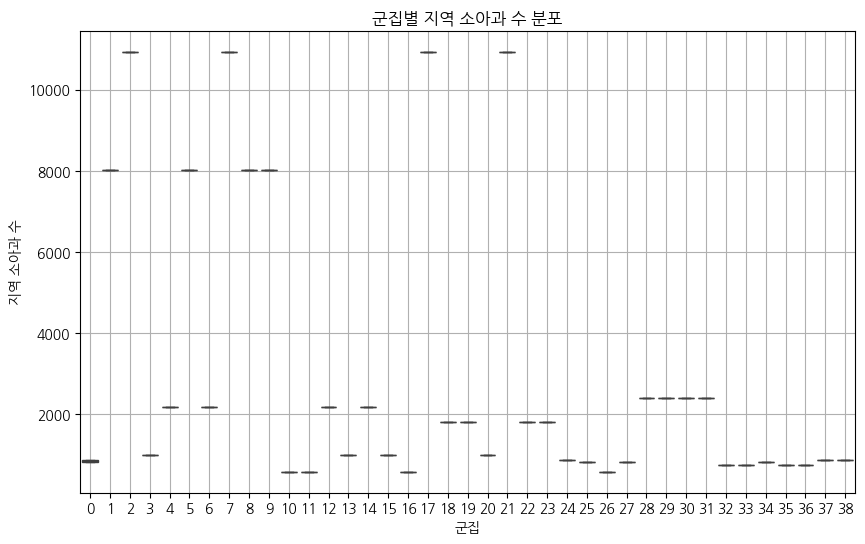

In [106]:
# k-mean 군집화 분석 

Kcluster_counts = NABIS['K-MEAN 군집'].value_counts()
print("\n군집별 데이터 수:\n", Kcluster_counts)

Kcluster_means = NABIS.groupby('K-MEAN 군집').mean()
print("\n군집별 평균값:\n", Kcluster_means)

plt.figure(figsize=(10, 6))
sns.boxplot(x='K-MEAN 군집', y='최종수가_표준화', data=NABIS)
plt.title('군집별 최종수가_표준화 분포')
plt.xlabel('군집')
plt.ylabel('최종수가_표준화')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='K-MEAN 군집', y='지역 소아과 수', data=NABIS)
plt.title('군집별 지역 소아과 수 분포')
plt.xlabel('군집')
plt.ylabel('지역 소아과 수')
plt.grid(True)
plt.show()

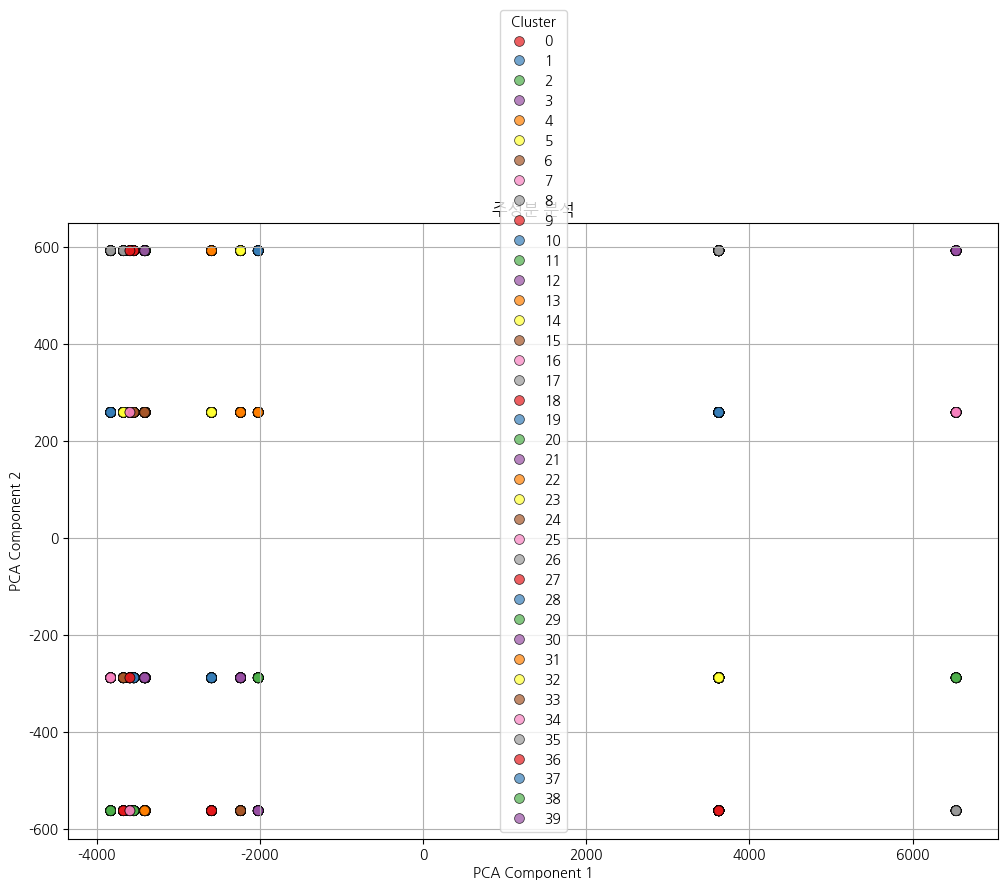

In [103]:
# PCA
from sklearn.decomposition import PCA
NABIS1 = NABIS.copy()

# 2차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

NABIS1['PCA1'] = pca_result[:, 0]
NABIS1['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='K-MEAN 군집', palette='Set1', data=NABIS1, s=50, alpha=0.7, edgecolor='k')
plt.title('주성분 분석')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

[0]	validation_0-rmse:3626.74130	validation_1-rmse:3620.70939
[1]	validation_0-rmse:3594.51162	validation_1-rmse:3588.81644
[2]	validation_0-rmse:3562.63391	validation_1-rmse:3557.27725
[3]	validation_0-rmse:3531.10509	validation_1-rmse:3526.08873
[4]	validation_0-rmse:3499.92157	validation_1-rmse:3495.24733
[5]	validation_0-rmse:3469.08028	validation_1-rmse:3464.74996
[6]	validation_0-rmse:3438.57805	validation_1-rmse:3434.59347
[7]	validation_0-rmse:3408.41201	validation_1-rmse:3404.77498
[8]	validation_0-rmse:3378.57874	validation_1-rmse:3375.29110
[9]	validation_0-rmse:3349.07532	validation_1-rmse:3346.13890
[10]	validation_0-rmse:3319.89861	validation_1-rmse:3317.31526
[11]	validation_0-rmse:3291.04578	validation_1-rmse:3288.81735
[12]	validation_0-rmse:3262.51361	validation_1-rmse:3260.64194
[13]	validation_0-rmse:3234.29917	validation_1-rmse:3232.78612
[14]	validation_0-rmse:3206.39963	validation_1-rmse:3205.24707
[15]	validation_0-rmse:3178.81205	validation_1-rmse:3178.02183
[1

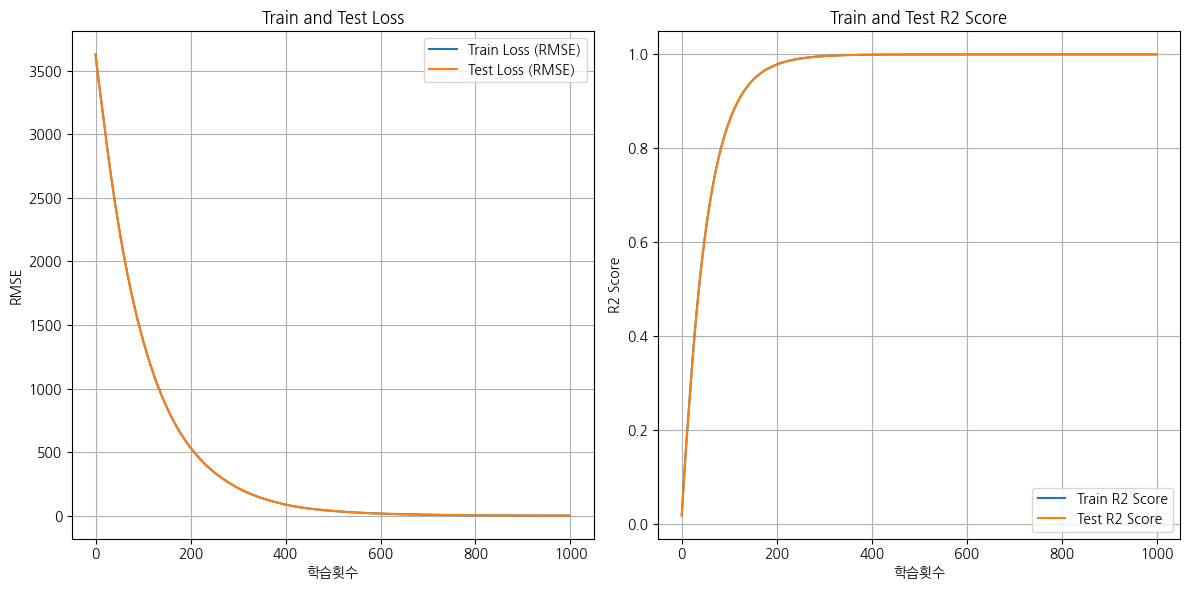


최종 Mean Squared Error: 1.78
최종 R2 Score: 1.00


c:\Users\hwans\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:38:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [104]:
# MODEL 학습

X = NABIS[['진료과목_인코딩', '지역_인코딩', '의료기관_인코딩', '최종수가_표준화', 'K-MEAN 군집']]
y = NABIS['지역 소아과 수']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

evals_result = xgb_model.evals_result()
train_loss = evals_result['validation_0']['rmse']
test_loss = evals_result['validation_1']['rmse']

train_r2_scores = []
test_r2_scores = []

for i in range(len(train_loss)):
    y_train_pred = xgb_model.predict(X_train, iteration_range=(0, i + 1))
    y_test_pred = xgb_model.predict(X_test, iteration_range=(0, i + 1))
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss (RMSE)')
plt.plot(test_loss, label='Test Loss (RMSE)')
plt.xlabel('학습횟수')
plt.ylabel('RMSE')
plt.title('Train and Test Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_r2_scores, label='Train R2 Score')
plt.plot(test_r2_scores, label='Test R2 Score')
plt.xlabel('학습횟수')
plt.ylabel('R2 Score')
plt.title('Train and Test R2 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n최종 Mean Squared Error: {mse:.2f}")
print(f"최종 R2 Score: {r2:.2f}")

xgb_model.save_model('./xgboost_model.model')